# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_key + "&q=" + city + "&units=celsius"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | nueva loja
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | viale
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | bath
Processing Record 8 of Set 1 | ndele
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | olinda
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | cromer
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | kalevala
Processing Record 19 of Set 1 | waitara
Processing Record 20 of Set 1 | pindwara
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | vorgashor
Process

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,-34.5322,283.38,67,10,5.00,ZA,1689868823
1,tiksi,71.6872,71.6872,279.55,62,55,3.21,RU,1689868827
2,nueva loja,0.0847,0.0847,296.16,100,75,0.51,EC,1689868832
3,puerto natales,-51.7236,-51.7236,274.87,99,100,1.30,CL,1689868567
4,viale,-31.8678,-31.8678,291.04,49,56,4.94,AR,1689868837


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,-34.5322,283.38,67,10,5.00,ZA,1689868823
1,tiksi,71.6872,71.6872,279.55,62,55,3.21,RU,1689868827
2,nueva loja,0.0847,0.0847,296.16,100,75,0.51,EC,1689868832
3,puerto natales,-51.7236,-51.7236,274.87,99,100,1.30,CL,1689868567
4,viale,-31.8678,-31.8678,291.04,49,56,4.94,AR,1689868837


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

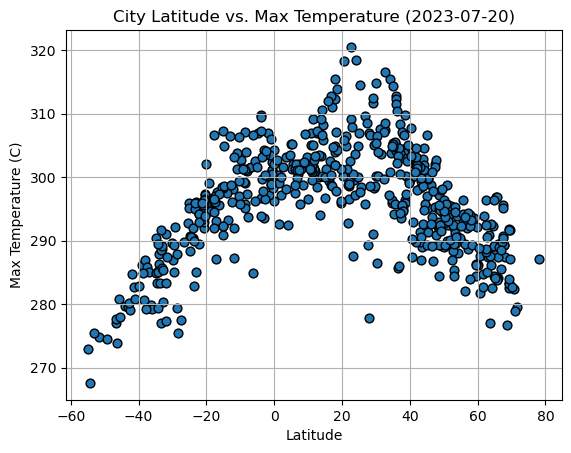

In [155]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot.scatter("Lat", "Max Temp", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
ax.set_title(f"City Latitude vs. Max Temperature ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

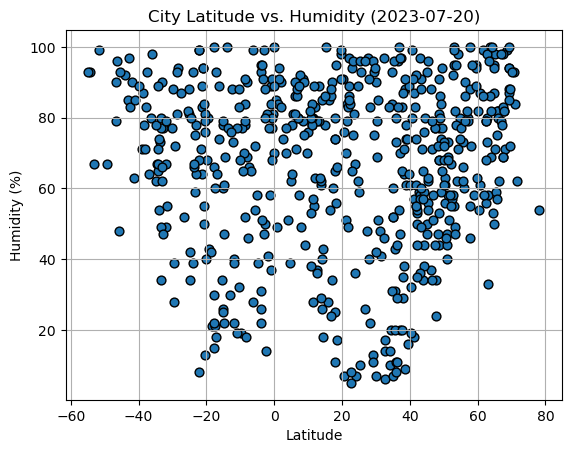

In [156]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot.scatter("Lat", "Humidity", grid=True, s=40, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

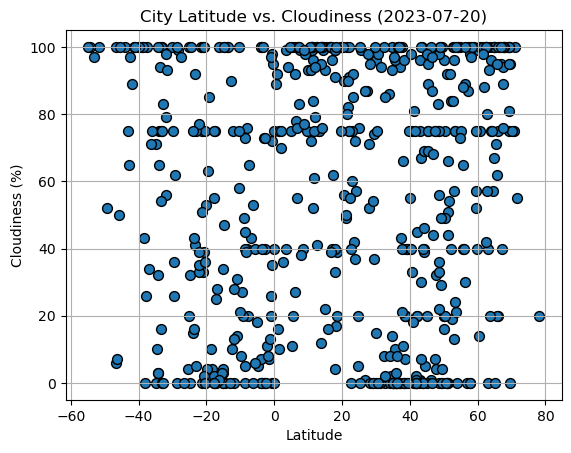

In [157]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot.scatter("Lat", "Cloudiness", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

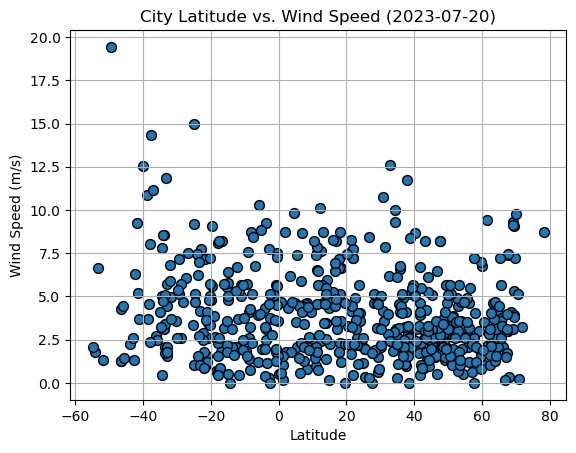

In [158]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot.scatter("Lat", "Wind Speed", grid=True, s=50, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(city_data_df['Date'][1]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [140]:
# Define a function to create Linear Regression plots
df = northern_hemi_df
x = "Lat"
y = "Max Temp"
def lin_regress_plot(df, x, y):
    # Linear regression on Northern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])

    regress_values = slope*df[x] + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create plots
    ax = df.plot.scatter(x, y, color="#7FAEEC", s=30)
    plt.plot(df[x], regress_values, "r-")

    # Add labels
    ax.set_xlabel("Latitude")
    ax.set_ylabel(y)
    ax.annotate(line_eq,(df[x].min()+5,df[y].max()-5),fontsize=15,color="red")

    print(f"The r-value is: {rvalue}")

    plt.show()
    return(rvalue)


In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,71.6872,279.55,62,55,3.21,RU,1689868827
2,nueva loja,0.0847,0.0847,296.16,100,75,0.51,EC,1689868832
5,college,64.8569,64.8569,289.14,95,100,2.06,US,1689868803
6,bath,51.3779,51.3779,294.74,69,44,3.86,GB,1689868839
7,ndele,8.4109,8.4109,298.79,91,99,0.78,CF,1689868840


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,-34.5322,283.38,67,10,5.00,ZA,1689868823
3,puerto natales,-51.7236,-51.7236,274.87,99,100,1.30,CL,1689868567
4,viale,-31.8678,-31.8678,291.04,49,56,4.94,AR,1689868837
10,port-aux-francais,-49.3500,-49.3500,274.52,67,52,19.43,TF,1689868843
11,olinda,-8.0089,-8.0089,301.00,69,40,8.75,BR,1689868578


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6426300923923755


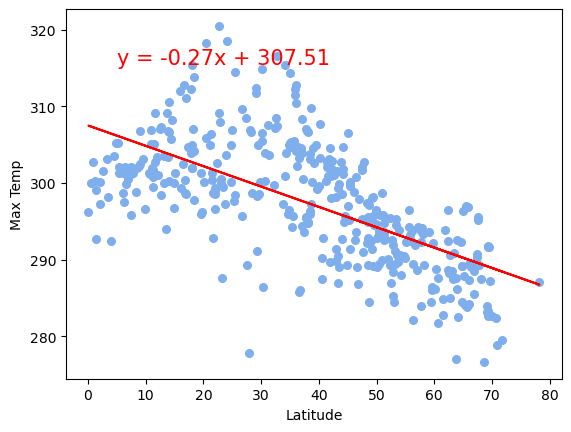

-0.6426300923923755

In [141]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

The r-value is: 0.8652438254591702


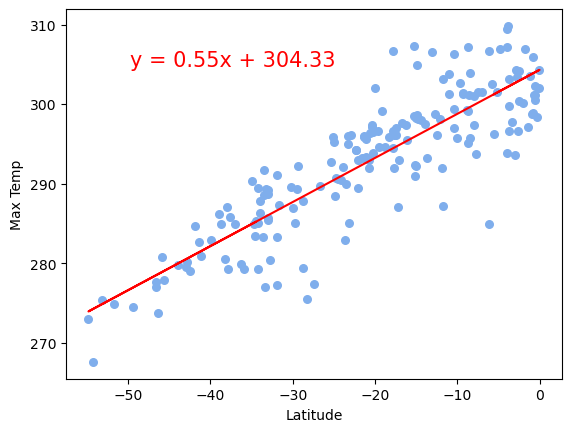

0.8652438254591702

In [142]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Max Temp"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** The data shows a positive relationship between latitude and maximum temperature in the southern hemisphere and a negative raltionshop in the northern hemisphere. In other words, the maximum temperature tends to be higher closer to the equator. The data pull on 7/20/2023 shows a strong relationship in the southern hemisphere (0.865) than in the northern hemisphere (-0.643), but the strength will vary based on the random sample.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11409041090033704


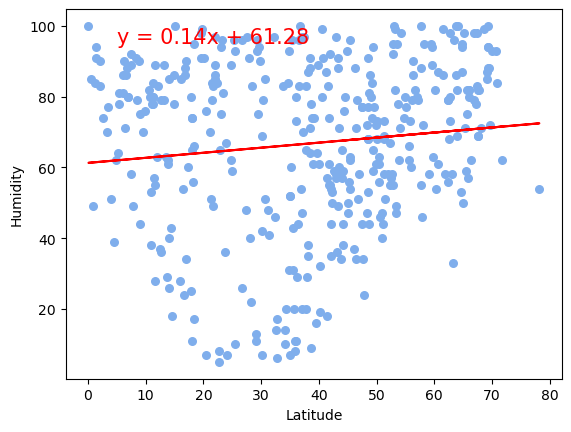

0.11409041090033704

In [143]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

The r-value is: -0.22308681047516923


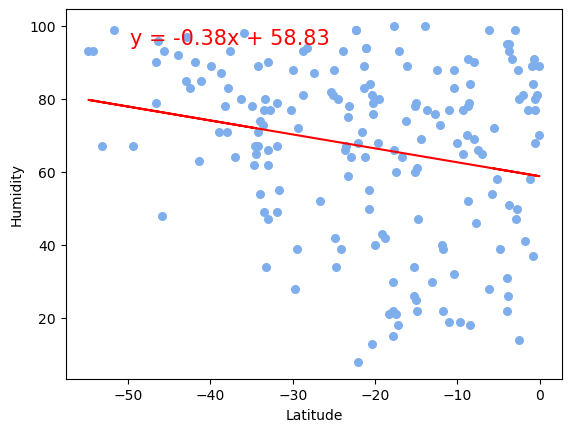

-0.22308681047516923

In [144]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Humidity"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Humidity does not have a strong correlation with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05175679495462814


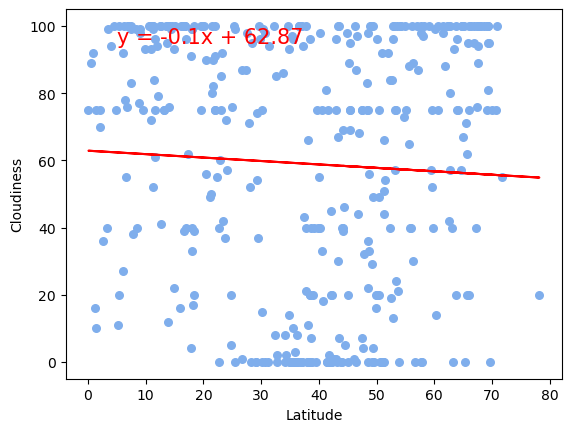

-0.05175679495462814

In [145]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

The r-value is: -0.32961992729957784


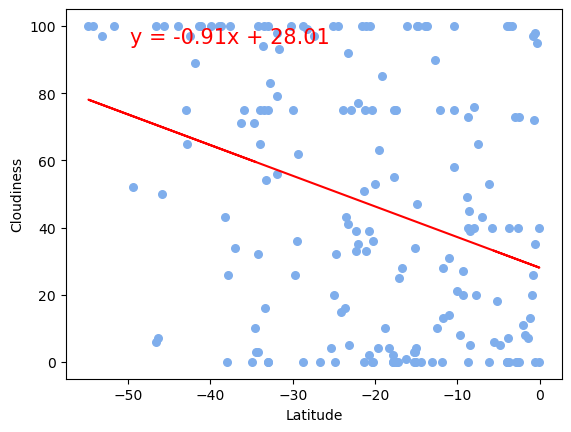

-0.32961992729957784

In [146]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Cloudiness"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Cloudiness does not have a strong correlation with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09626697391368011


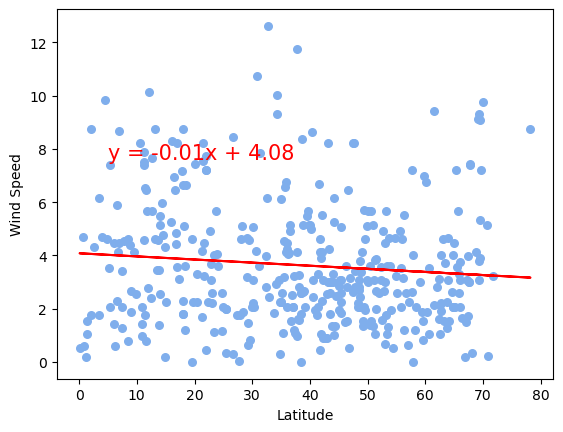

-0.09626697391368011

In [147]:
# Linear regression on Northern Hemisphere
df = northern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

The r-value is: -0.1494211298367497


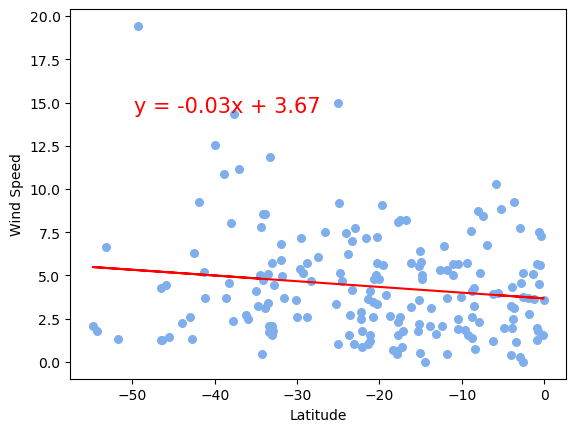

-0.1494211298367497

In [148]:
# Linear regression on Southern Hemisphere
df = southern_hemi_df
x = "Lat"
y = "Wind Speed"

lin_regress_plot(df, x, y)

**Discussion about the linear relationship:** Wind Speed has the weakest correlation with latitude (r value closest to 0 in both hemispheres).